# Libraries

In [1]:
library(tidyverse)
library(dagitty)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Question

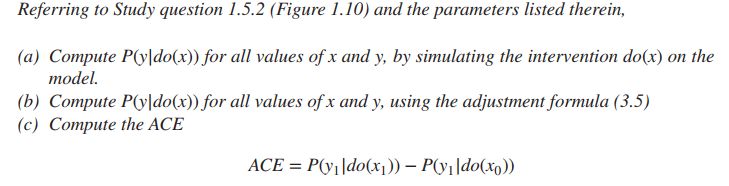

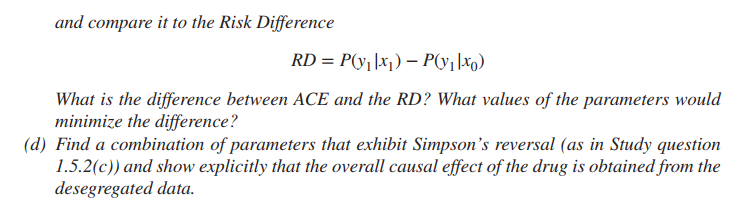

Figure 1.10 in study question 1.5.2:

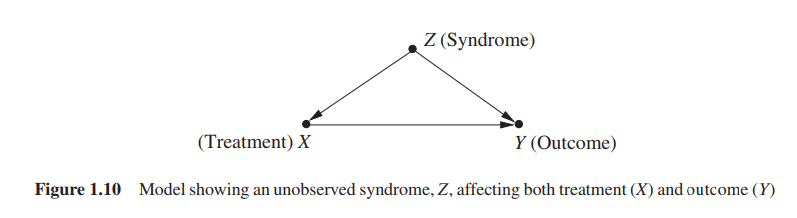

Additional info:

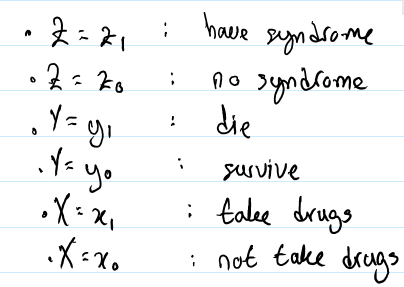

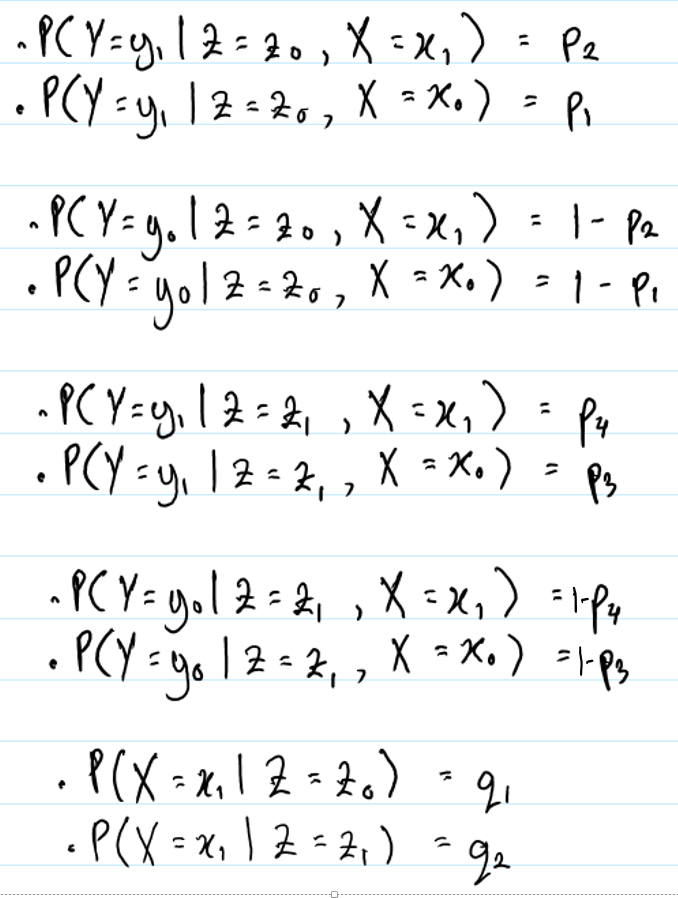

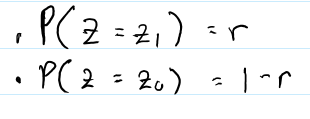

# Solution

**(a)**

DAG with intervention:

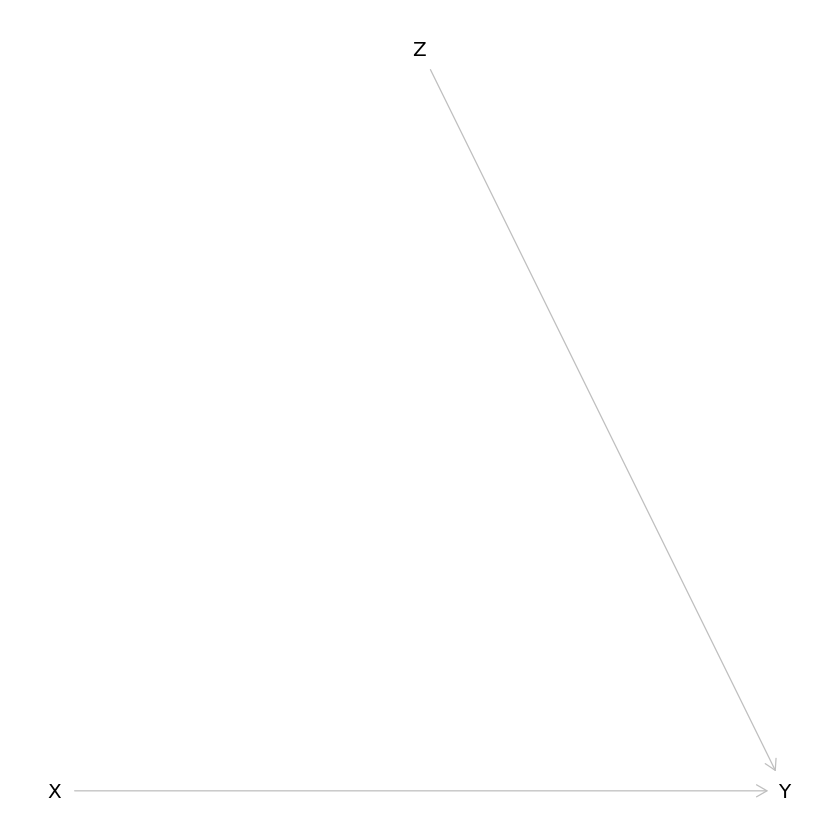

In [2]:
g <- dagitty('dag {
    X -> Y
    Z -> Y
}')

coordinates(g) <- list(x = c(X=1, Z=2, Y=3), y = c(X=1, Z=0, Y=1))
plot(g)

Useful rule to know:

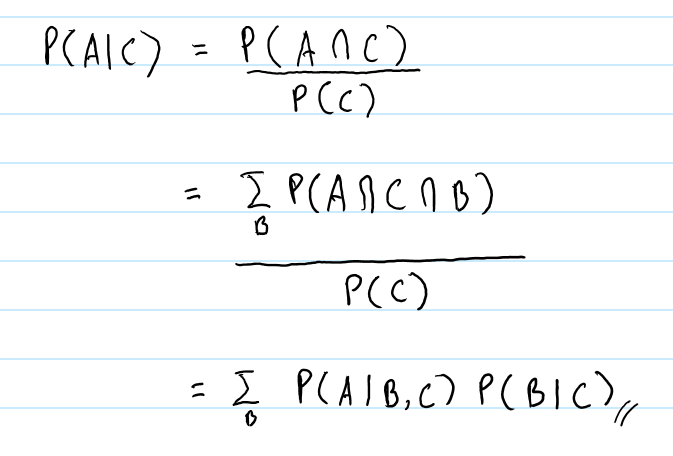

Derive the adjustment formula:

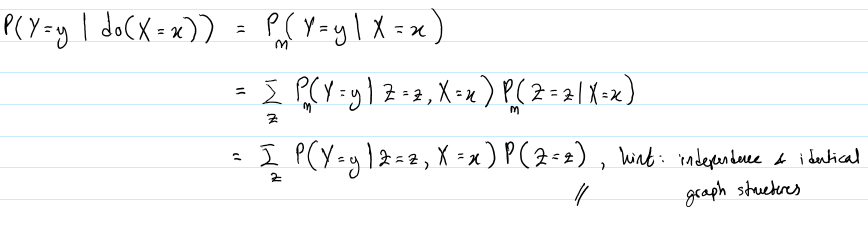

When $Y=y_0$, $X = x_0$:

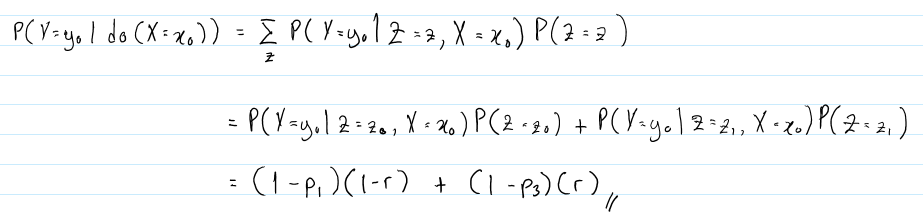

When $Y=y_0$, $X = x_1$:

# 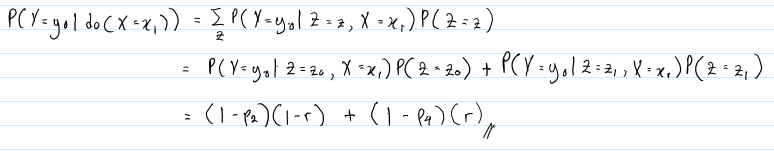

When $Y=y_1$, $X = x_0$:

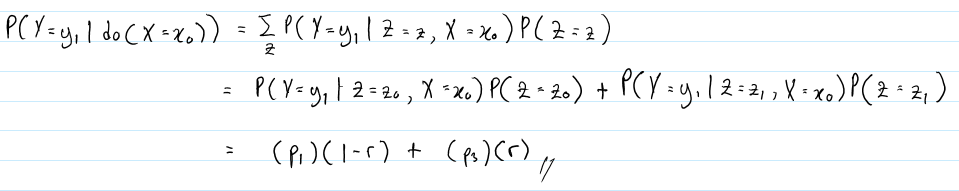

When $Y=y_1$, $X = x_1$:

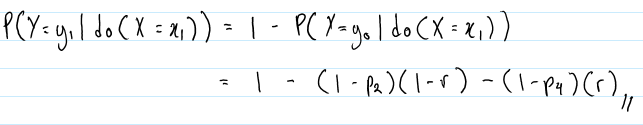

**(b)**

The adjustment formula:

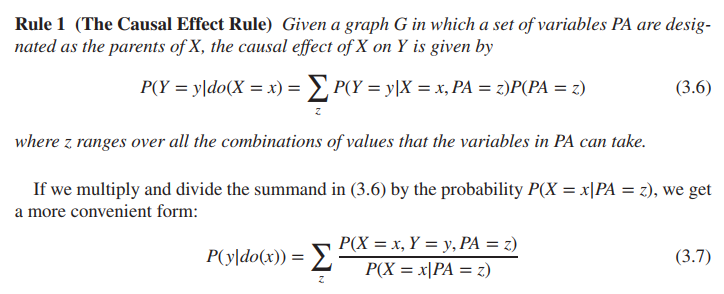

The DAG in Figure 1.10:

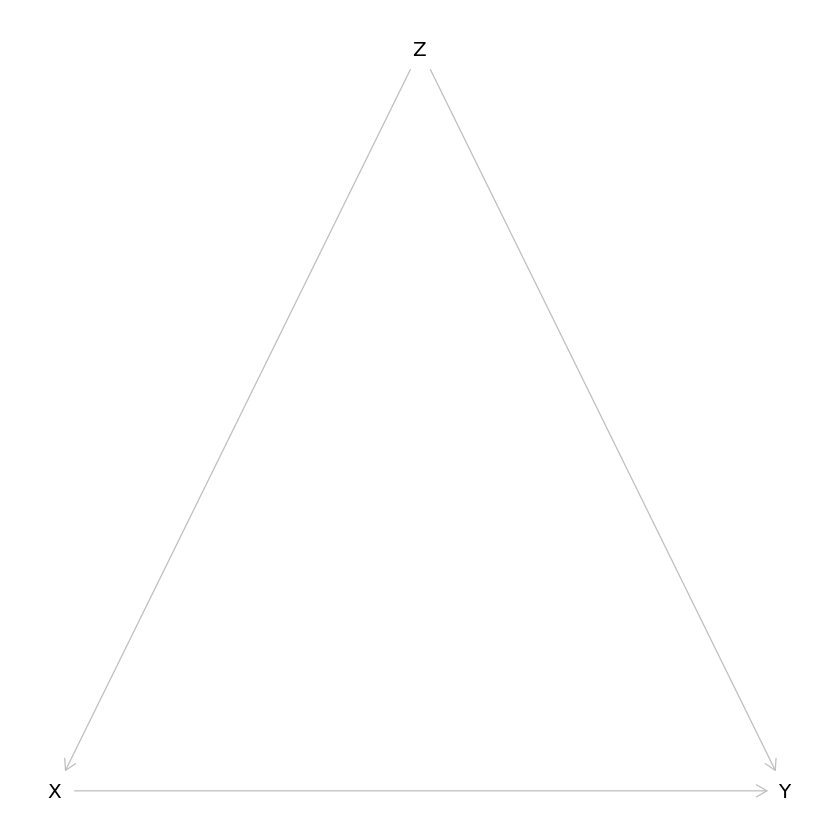

In [3]:
g <- dagitty('dag {
    X -> Y
    Z -> Y
    Z -> X
}')

coordinates(g) <- list(x = c(X=1, Z=2, Y=3), y = c(X=1, Z=0, Y=1))
plot(g)

The parents of X:

In [4]:
parents(g, "X")

[1] "Z"

Applying equation 3.6 is now straight forward...

**(c)**

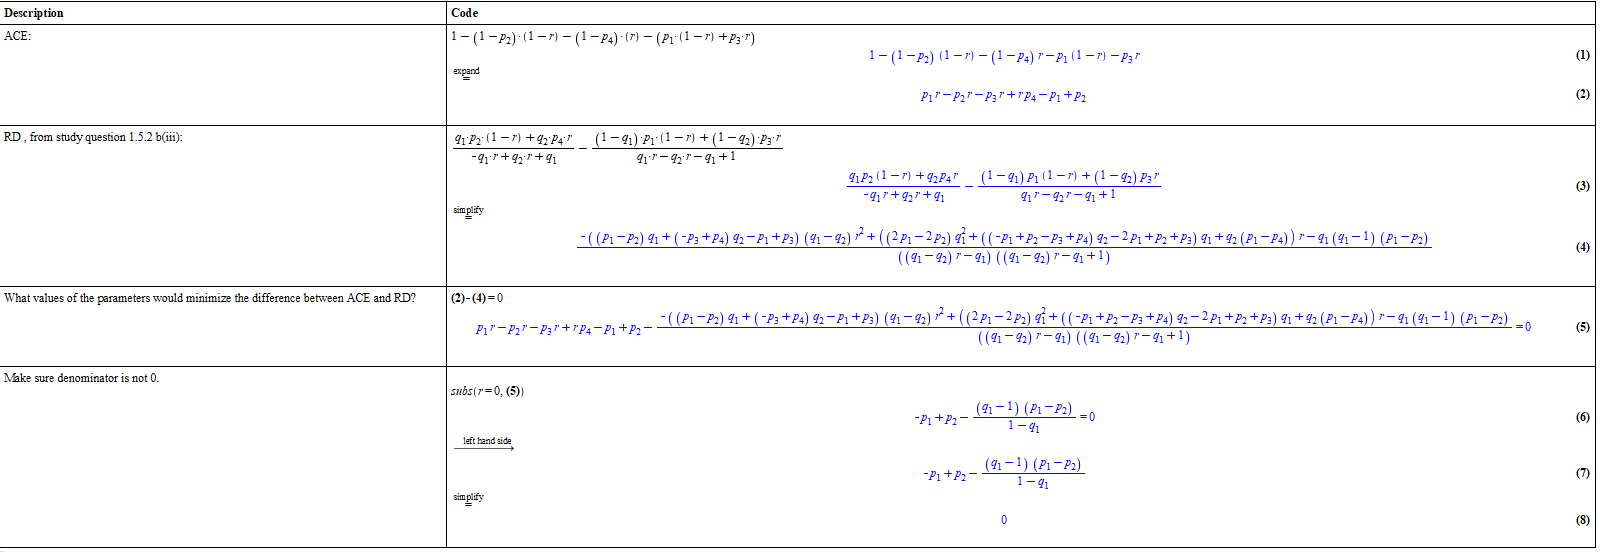

So, when $r=0$ and $q_1 \neq 1$, then ACE and RD will be equal.

**(d)**

Parameters can be found in [this](../ch_01/study_question_1.5.2_part_c_opt.ipynb) notebook.

E.g from Set 2 this set exhibits Simpson's Reversal:

In [5]:
p1 <- 1.0
p2 <- 0.90
p3 <- 0.10
p4 <- 0.0
q1 <- 1
q2 <- 0
r <- 0.10

The above set gave the following probabilities:

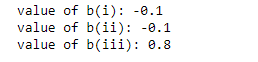

Where:

* b(i): $Z = z_1$
* b(ii): $Z = z_0$
* b(iii): entire population i.e. aggregated data

If we use the adjustment formula to compute the ACE:

In [6]:
y_1_do_x_1 = 1 - (1 - p2) * (1 - r) - (1 - p4) * r
y_1_do_x_0 = p1 * (1 - r) + p3 * r

y_1_do_x_1 - y_1_do_x_0

[1] -0.1

Therefore,  taking the drug i.e. $X=x_1$ actually increases the probability of not dying i.e. $Y=y_1$.